# Sentiment Analysis
Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.

In [82]:
import json # import json
import numpy as np # import numpy
import matplotlib.pyplot as plt
import itertools # import itertools 
import tensorflow as tf # import tensorflow

In [5]:
tf.__version__

'2.8.0'

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary
training_size = 20000 # training size from the data set

## Load json file

In [11]:
with open("sarcasm.json", "r") as f: # reading our json file 
    df = json.load(f)

In [14]:
sentences = [] # list for our sentences
labels = [] # list containing our labels i.e either 0 or 1 sentiment

for item in df:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [23]:
#print(labels
print(len(sentences))

26709


## Splitting our data into training and testing 

In [64]:
training_sentences = sentences[0:training_size] # 20000 from the total data set
testing_sentences = sentences[training_size:] # size 6709 part for testing
training_labels = labels[0:training_size] # size 20000 from the label
testing_labels = labels[training_size:] # size 6709 from the label for testing

## Preprocessing and  Tokenization 

In [65]:
from tensorflow.keras.preprocessing.text import Tokenizer
oov_tok = '<OOV>' # out of vocabulary

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
#Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(training_sentences) 

In [66]:
word_index = tokenizer.word_index
word_index.items()

#print first 10 samples
print(dict(itertools.islice(word_index.items(), 10)))

{'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10}


In [67]:
#Transforms each text in texts to a sequence of integers.
training_sequences = tokenizer.texts_to_sequences(training_sentences)

# padding : String, 'pre' or 'post' (optional, defaults to 'pre'): 
#pad either before or after each sequence.

# Truncating: String, 'pre' or 'post' (optional, defaults to 'pre'): remove values from sequences larger than maxlen, 
#either at the beginning or at the end of the sequences.

max_length = 100
trunc_type = 'post'
padding_type = 'post'
training_padded = pad_sequences(training_sequences, maxlen = max_length,
                               padding=padding_type, truncating=trunc_type)
# Same for testing setences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

testing_padded = pad_sequences(testing_sequences, maxlen = max_length,
                               padding=padding_type, truncating=trunc_type)


In [68]:
training_sequences[1:4] # sample

[[4, 6840, 3096, 3097, 23, 2, 161, 1, 390, 2842, 6, 251, 9, 889],
 [153, 890, 2, 891, 1445, 2215, 595, 5650, 221, 133, 36, 45, 2, 8864],
 [1252, 38, 213, 382, 2, 1572, 29, 288, 23, 10, 2405, 1446, 5651, 958]]

In [69]:
training_padded[1] # sample after padding

array([   4, 6840, 3096, 3097,   23,    2,  161,    1,  390, 2842,    6,
        251,    9,  889,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

## Converting to arrays

In [74]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
type(testing_labels)

numpy.ndarray

## Building our model

In [80]:
vocab_size = 10000
embedding_dim = 16
max_length = 100

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid" )
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = [ 'accuracy'] )
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 24)                408       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [81]:
# training our model
epochs = 30
history = model.fit(training_padded,
                   training_labels,
                   epochs=epochs,
                   validation_data = (testing_padded, testing_labels),
                   verbose =2)

Epoch 1/30


2022-02-16 07:52:13.985270: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-16 07:52:14.345507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-16 07:52:24.874279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 - 11s - loss: 0.6582 - accuracy: 0.5949 - val_loss: 0.5542 - val_accuracy: 0.7795 - 11s/epoch - 18ms/step
Epoch 2/30
625/625 - 9s - loss: 0.4086 - accuracy: 0.8405 - val_loss: 0.3754 - val_accuracy: 0.8414 - 9s/epoch - 14ms/step
Epoch 3/30
625/625 - 9s - loss: 0.2942 - accuracy: 0.8835 - val_loss: 0.3508 - val_accuracy: 0.8514 - 9s/epoch - 14ms/step
Epoch 4/30
625/625 - 9s - loss: 0.2437 - accuracy: 0.9046 - val_loss: 0.3485 - val_accuracy: 0.8499 - 9s/epoch - 14ms/step
Epoch 5/30
625/625 - 9s - loss: 0.2095 - accuracy: 0.9195 - val_loss: 0.3500 - val_accuracy: 0.8566 - 9s/epoch - 14ms/step
Epoch 6/30
625/625 - 9s - loss: 0.1816 - accuracy: 0.9318 - val_loss: 0.3592 - val_accuracy: 0.8547 - 9s/epoch - 14ms/step
Epoch 7/30
625/625 - 8s - loss: 0.1607 - accuracy: 0.9406 - val_loss: 0.3782 - val_accuracy: 0.8530 - 8s/epoch - 14ms/step
Epoch 8/30
625/625 - 9s - loss: 0.1424 - accuracy: 0.9479 - val_loss: 0.4026 - val_accuracy: 0.8498 - 9s/epoch - 14ms/step
Epoch 9/30
625/625 - 9s -

In [88]:
history.history['accuracy'][1:4]

[0.8405000567436218, 0.8834500312805176, 0.9045500159263611]

In [93]:
# plotting
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.title('Plot of '+string+' at each Epoch')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    

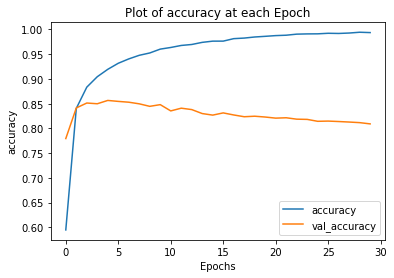

In [94]:
plot_graph(history, 'accuracy')

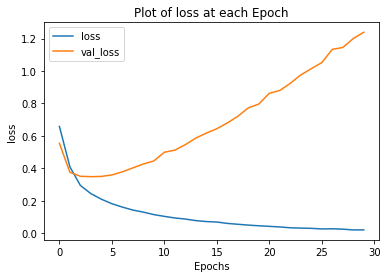

In [95]:
plot_graph(history, 'loss')

In [ ]:
## Reversing words

In [152]:
#reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#def decode_sentence(text):
#    return ' '.join([reverse_word_index.get(i, '?') for i in text])

#print(decode_sentence(training_padded[2]))
#print(training_sentences[2])
#print(labels[2])

### testing our model for sentiments

In [154]:
sentence = ["the pleasure of sex", "granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
padded2 = np.array(padded)
pred = model.predict(padded)
print(np.round(pred, 3))

[[0.001]
 [0.882]
 [0.   ]]
